In [59]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import pandas as pd
import lmfit
import copy

# Functions

In [2]:
def birth_death(t=0,t_end=30,HSC_start=50,b=1.3,d=1.3):
    """ Stochastic simulation algorithm 
    Inputs:
    t:         time counter
    t_end:     simulation end time
    HSC_start: number of star:ting cells
    b:         birth rate
    d:         death rate
    
    Returns:
    array of timepoints and corresponding clone sizes
    """
    # create an table with timepoints for recording
    checkpoints = np.zeros((2, t_end + 1))
    checkpoints[0] = np.linspace(0, t_end, t_end + 1)
    checkpoints[1,0] = HSC_start
    # initialise cell counter
    HSC = HSC_start
    
    while t < t_end:
        previous_t = t

        propensities = np.array([b * HSC, d * HSC])
        total_propensity = np.sum(propensities)
        q_probability = propensities / total_propensity

        tau = np.random.exponential(scale=1 / total_propensity)
        t += tau

        checkpoints[1, int(previous_t) + 1:int(t) + 1] = HSC
        q = np.random.choice(2, p=q_probability)

        if q == 0:
            HSC += 1
        else:
            HSC -= 1
            if HSC == 0:
                t = 0
                HSC = HSC_start
    return checkpoints

In [3]:
def clone_size(t, s, N):
    """Time evolution of the size of a clone using N(t)= N*e^(st).
    Parameters:
    t: float or array of floats. Time or time points at which we want to evaluate the expected clone size.
    s: float. Fitness advantage, defined as the difference between the birth and death rates of a clone.
    N: float. Size of a clone at initial time.
    Returns:
    float or array of floats. Clone size.
    """
    return N*np.exp(s*t)

In [4]:
def residual(p, t, data=None):
    """Returns the difference between model prediction and data.
    Inputs:
    p: lmfit model parameters.
    t: Float array. x-axis of data.
    data: Float array. y-axis of data.
    Returns:
    Float: Difference between model prediction and data."""
    
    # Convert model parameters to a dictionary.
    vals = p.valuesdict()
    s = vals['fitness']
    N = vals['init_size']
    
    # For a given time, fitness and initial size
    # predict the clone size using clone_size function.
    model_predict = clone_size(t, s, N)
    
    if data is None:
        return model_predict
    
    return model_predict - data

def model_fit (t, data):
    """Model fit. This function fits an exponential model of clonal evolution to data.
    To produce the fit this model includes a fitness parameter and an initial clone size parameter.
    Parameters:
    t: Float array. Observed time points in data (x-axis).
    data: Float array. Observed clone size in data (y-axis).
    Returns:
    lmfit minimzer model."""
    
    # Step 1: Create model parameters
    p = lmfit.Parameters()
    # Add exponential clone size model parameters
    p.add('fitness', min=0, max=0.5)
    p.add('init_size', min=0, max=max(data))

    # Step 2: Crete Minimizer object model that minimizes the residual function
    model_minimize = lmfit.minimize(residual, p, method='Nelder', args=(t,), kws={'data': data})
    
    return model_minimize

In [5]:
def multiple_trajectory_fit (dataset):
    """Performs parameter fitting on multiple trajectories."""
    
    fitting_result = []
    for trajectory in dataset:
        fitting_result.append(model_fit(t = trajectory[0], data = trajectory[1]))
    
    inferred_fit = []
    for j in fitting_result:
        inferred_fit.append(j.params['fitness'])
    
    return inferred_fit

In [ ]:
def multiple_trajectory_fit2 (dataset, t):
    """Performs parameter fitting on multiple trajectories. Allows for separately specify the time."""
    fitting_result = []
    for trajectory in dataset:
        fitting_result.append(model_fit(t, data = trajectory))
    
    inferred_fit = []
    for j in fitting_result:
        inferred_fit.append(j.params['fitness'])
    
    return inferred_fit

## What is the variation of the inferred fitness between many simulations of clones with the same fitness?

- input fitness 0.05-0.4
- median age of mutation 50; simulate for 30 years
- HSC_start = 1
- only trajectories that survive

In [6]:
# s=0.05

trajectories_s05 = []
for i in range(20):
    trajectories_s05.append(birth_death(b=1.35,HSC_start=1))

inferred_fit_s05 = multiple_trajectory_fit(dataset = trajectories_s05)

# s = 0.1
trajectories_s1 = []
for i in range(20):
    trajectories_s1.append(birth_death(b=1.4,HSC_start=1))

inferred_fit_s1 = multiple_trajectory_fit(dataset = trajectories_s1)

# s = 0.15
trajectories_s15 = []
for i in range(20):
    trajectories_s15.append(birth_death(b=1.45,HSC_start=1))

inferred_fit_s15 = multiple_trajectory_fit(dataset = trajectories_s15)

# s = 0.2
trajectories_s2 = []
for i in range(20):
    trajectories_s2.append(birth_death(b=1.5,HSC_start=1))

inferred_fit_s2 = multiple_trajectory_fit(dataset = trajectories_s2)

# s = 0.3
trajectories_s3 = []
for i in range(20):
    trajectories_s3.append(birth_death(b=1.6,HSC_start=1))

inferred_fit_s3 = multiple_trajectory_fit(dataset = trajectories_s3)

In [7]:
# s = 0.25
trajectories_s25 = []
for i in range(20):
    trajectories_s25.append(birth_death(b=1.55,HSC_start=1))

inferred_fit_s25 = multiple_trajectory_fit(dataset = trajectories_s25)

In [8]:
# s = 0.35
trajectories_s35 = []
for i in range(20):
    trajectories_s35.append(birth_death(b=1.65,HSC_start=1))

inferred_fit_s35 = multiple_trajectory_fit(dataset = trajectories_s35)

In [9]:
# s = 0.4 !!This can take a while to run as it is computationally demanding!!
trajectories_s4 = []
for i in range(20):
    trajectories_s4.append(birth_death(b=1.7,HSC_start=1))

inferred_fit_s4 = multiple_trajectory_fit(dataset = trajectories_s4)

In [ ]:
# Plotting the trajectories

for data_to_plot in trajectories_s05:
    plt.plot(data_to_plot[0], data_to_plot[1])

In [43]:
# Pick out the larges value from each trajectory

maximum_values = []
for i in trajectories_s05:
    maximum_values.append(max(i[1]))

In [44]:
# Pick out the largest value among trajectories
max(maximum_values)

1847429.0

In [45]:
# Create a list of all the fitting results
inferred_fit = [inferred_fit_s05, inferred_fit_s1, inferred_fit_s15, inferred_fit_s2, inferred_fit_s25, inferred_fit_s3, inferred_fit_s35, inferred_fit_s4]

In [46]:
# Turn the list into a dataframe
df = pd.DataFrame(inferred_fit,
                 index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [47]:
# Transpose the dataframe
df = df.T

In [48]:
# Boxplot of estimated fitnesses
fig = px.box(df)
fig.update_layout(xaxis_title='Real fitness',
                  yaxis_title='Inferred fitness')
fig.show()
#fig.write_image("figure1.svg", engine="orca")

In [49]:
# Curve and rug plot
group_labels = ['s = 0.05', 's = 0.1', 's = 0.15', 's = 0.2', 's = 0.25', 's = 0.3', 's = 0.35', 's = 0.4']

fig = ff.create_distplot(inferred_fit, group_labels, show_hist=False)
fig.update_layout(xaxis_title='Inferred fitness advantage')
fig.show()
#fig.write_image("Figure 2.svg", engine="orca")

In [50]:
def fitness_to_error (fitness, s):
    """Convert estimated fitness to absolute error."""
    fitness_error_list = []
    for value in fitness:
        fitness_error_list.append(np.abs(value - s))
    return fitness_error_list

In [51]:
error_s05 = fitness_to_error(fitness = inferred_fit_s05, s = 0.05)
error_s1 = fitness_to_error(fitness = inferred_fit_s1, s = 0.1)
error_s15 = fitness_to_error(fitness = inferred_fit_s15, s = 0.15)
error_s2 = fitness_to_error(fitness = inferred_fit_s2, s = 0.2)
error_s25 = fitness_to_error(fitness = inferred_fit_s25, s = 0.25)
error_s3 = fitness_to_error(fitness = inferred_fit_s3, s = 0.3)
error_s35 = fitness_to_error(fitness = inferred_fit_s35, s = 0.35)
error_s4 = fitness_to_error(fitness = inferred_fit_s4, s = 0.4)

In [52]:
inferred_fit_error = [error_s05, error_s1, error_s15, error_s2, error_s25, error_s3, error_s35, error_s4]

In [53]:
df_error = pd.DataFrame(inferred_fit_error,
                        index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [54]:
df_error

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.05,0.077893,0.066765,0.018673,0.036582,0.065415,0.095470,0.046470,0.020113,0.002884,0.050000,0.028634,0.058803,0.018917,0.000549,0.042409,0.017853,0.029642,0.087591,0.037952,0.033472
0.1,0.030880,0.023922,0.028632,0.047427,0.008951,0.017471,0.016779,0.001300,0.052034,0.084398,0.085190,0.071507,0.007308,0.012764,0.007689,0.074991,0.053446,0.041185,0.095405,0.039637
0.15,0.019639,0.011327,0.010973,0.000157,0.141946,0.013600,0.023275,0.031219,0.024796,0.100624,0.024037,0.006288,0.032673,0.012455,0.012692,0.007488,0.144067,0.027258,0.003299,0.027633
0.2,0.027314,0.011780,0.003858,0.028643,0.025353,0.016878,0.042121,0.000320,0.008522,0.006178,0.017677,0.003708,0.004953,0.065088,0.012623,0.018426,0.028262,0.024009,0.061488,0.001273
0.25,0.007142,0.004984,0.003760,0.006783,0.002316,0.005264,0.001727,0.019073,0.021724,0.000170,0.088005,0.009280,0.009385,0.041182,0.027409,0.004263,0.001229,0.006996,0.008006,0.001261
0.3,0.002328,0.019173,0.041442,0.005908,0.000788,0.001244,0.000498,0.003833,0.000924,0.008273,0.002891,0.020687,0.000647,0.003932,0.007614,0.010575,0.002961,0.002188,0.003238,0.009746
0.35,0.001542,0.003444,0.000182,0.000357,0.000100,0.003712,0.000389,0.006171,0.000542,0.000707,0.009453,0.004075,0.003161,0.000492,0.005874,0.001274,0.002503,0.001731,0.000177,0.000443
0.4,0.000800,0.000128,0.001011,0.000455,0.001573,0.000742,0.004695,0.001054,0.000121,0.001327,0.005090,0.005683,0.001887,0.000801,0.000643,0.004835,0.002619,0.000332,0.001089,0.006437


In [55]:
df_error = df_error.T

In [57]:
# Boxplot of absolute error

fig = px.box(df_error)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of inferred fitness advantage')
fig.show()
#fig.write_image("Figure 3", engine="orca")

In [ ]:
inferred_fit_error_mean = []
for i in inferred_fit_error:
    inferred_fit_error_mean.append(np.mean(i))

In [ ]:
fig = px.scatter(inferred_fit_error_mean)

fig.update_xaxes(
    ticktext=["0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4"],
    tickvals=["0", "1", "2", "3", "4", "5", "6", "7"],
)

fig.update_layout(xaxis_title='Real fitness',
                  yaxis_title='Mean error of inferred fitness')
fig.show()
#fig.write_image("Figure 4.svg", engine="orca")

## How sensitive are the fitness estimates to the amount of observed data?

- 2-7 data points
- simulate for 40 years
- fitness advantage 0.15
- measuring age approx 70

In [10]:
simulation_trajectories = []

for i in range(100):
    simulation_trajectories.append(birth_death(b=1.45,HSC_start=1,t_end=40))

In [ ]:
inferred_fit_s15 = multiple_trajectory_fit(dataset = simulation_trajectories)
error_s15 = fitness_to_error(fitness = inferred_fit_s15, s = 0.15)

In [ ]:
for data_to_plot in simulation_trajectories:
    plt.plot(data_to_plot[0], data_to_plot[1])

In [ ]:
datapoints2 = []
datapoints3 = []
datapoints4 = []
datapoints5 = []
datapoints6 = []
datapoints7 = []

for i in simulation_trajectories:
    datapoints2.append(np.array([i[1][20], i[1][23]]))
    datapoints3.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))
    datapoints5.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29], i[1][32]]))
    datapoints6.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29], i[1][32], i[1][35]]))
    datapoints7.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29], i[1][32], i[1][35], i[1][38]]))

In [ ]:
t = np.array([20, 23])
inferred_fit_t2 = multiple_trajectory_fit2(datapoints2, t)

In [ ]:
t = np.array([20, 23, 26])
inferred_fit_t3 = multiple_trajectory_fit2(datapoints3, t)

In [ ]:
t = np.array([20, 23, 26, 29])
inferred_fit_t4 = multiple_trajectory_fit2(datapoints4, t)

In [ ]:
t = np.array([20, 23, 26, 29, 32])
inferred_fit_t5 = multiple_trajectory_fit2(datapoints5, t)

In [ ]:
t = np.array([20, 23, 26, 29, 32, 35])
inferred_fit_t6 = multiple_trajectory_fit2(datapoints6, t)

In [ ]:
t = np.array([20, 23, 26, 29, 32, 35, 38])
inferred_fit_t7 = multiple_trajectory_fit2(datapoints7, t)

In [ ]:
inferred_fit_datapoints = [inferred_fit_t2, inferred_fit_t3, inferred_fit_t4, inferred_fit_t5, inferred_fit_t6, inferred_fit_t7, inferred_fit_s15]

In [ ]:
plt.boxplot(inferred_fit_datapoints)
plt.show()

In [ ]:
error_datapoints = []

for i in inferred_fit_datapoints:
    error_datapoints.append(fitness_to_error(fitness = i, s = 0.15))

In [ ]:
df_datapoints_error = pd.DataFrame(error_datapoints,
                                  index=['2', '3', '4', '5', '6', '7', '40'])

In [ ]:
df_datapoints_error = df_datapoints_error.T

In [ ]:
fig = px.box(df_datapoints_error)
fig.update_layout(xaxis_title='Number of measured timepoints',
                  yaxis_title='Absolute error of inferred fitness')
fig.show()
#fig.write_image("Figure 5.svg", engine="orca")

In [ ]:
datapoints_error_mean = []
for i in error_datapoints:
    datapoints_error_mean.append(np.mean(i))

In [ ]:
fig = px.scatter(datapoints_error_mean)

fig.update_xaxes(ticktext=["2", "3", "4", "5", "6", "7"],
                 tickvals=["0", "1", "2", "3", "4", "5"])

fig.update_layout(xaxis_title='Number of measured timepoints',
                  yaxis_title='Mean error of inferred fitness')
fig.show()
#fig.write_image("Figure 6.svg", engine="orca")

In [ ]:
fig = px.line(datapoints_error_mean)
fig.update_xaxes(ticktext=["2", "3", "4", "5", "6", "7"],
                 tickvals=["0", "1", "2", "3", "4", "5"])

fig.update_layout(xaxis_title='Number of measured timepoints',
                  yaxis_title='Mean error of inferred fitness')
fig.show()

## Combined effects of stochasticity and few timepoints (sampled year 20-30)

In [ ]:
trajectories_s05_copy = copy.deepcopy(trajectories_s05)
trajectories_s1_copy = copy.deepcopy(trajectories_s1)
trajectories_s15_copy = copy.deepcopy(trajectories_s15)
trajectories_s2_copy = copy.deepcopy(trajectories_s2)
trajectories_s25_copy = copy.deepcopy(trajectories_s25)
trajectories_s3_copy = copy.deepcopy(trajectories_s3)
trajectories_s35_copy = copy.deepcopy(trajectories_s35)
trajectories_s4_copy = copy.deepcopy(trajectories_s4)

In [ ]:
# s=0.05
datapoints2_s05 = []
datapoints3_s05 = []
datapoints4_s05 = []

for i in trajectories_s05_copy:
    datapoints2_s05.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s05.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s05.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))
    
# s=0.1
datapoints2_s1 = []
datapoints3_s1 = []
datapoints4_s1 = []

for i in trajectories_s1_copy:
    datapoints2_s1.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s1.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s1.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))
    
# s=0.15
datapoints2_s15 = []
datapoints3_s15 = []
datapoints4_s15 = []

for i in trajectories_s15_copy:
    datapoints2_s15.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s15.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s15.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))
    
# s=0.2
datapoints2_s2 = []
datapoints3_s2 = []
datapoints4_s2 = []

for i in trajectories_s2_copy:
    datapoints2_s2.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s2.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s2.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))

# s=0.25
datapoints2_s25 = []
datapoints3_s25 = []
datapoints4_s25 = []

for i in trajectories_s25_copy:
    datapoints2_s25.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s25.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s25.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))

# s=0.3
datapoints2_s3 = []
datapoints3_s3 = []
datapoints4_s3 = []

for i in trajectories_s3_copy:
    datapoints2_s3.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s3.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s3.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))
    
# s=0.35
datapoints2_s35 = []
datapoints3_s35 = []
datapoints4_s35 = []

for i in trajectories_s35_copy:
    datapoints2_s35.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s35.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s35.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))

# s=0.4
datapoints2_s4 = []
datapoints3_s4 = []
datapoints4_s4 = []

for i in trajectories_s4_copy:
    datapoints2_s4.append(np.array([i[1][20], i[1][23]]))
    datapoints3_s4.append(np.array([i[1][20], i[1][23], i[1][26]]))
    datapoints4_s4.append(np.array([i[1][20], i[1][23], i[1][26], i[1][29]]))

In [ ]:
t = np.array([20, 23])
inferred_fit_t2_s05 = multiple_trajectory_fit2(datapoints2_s05, t)
inferred_fit_t2_s1 = multiple_trajectory_fit2(datapoints2_s1, t)
inferred_fit_t2_s15 = multiple_trajectory_fit2(datapoints2_s15, t)
inferred_fit_t2_s2 = multiple_trajectory_fit2(datapoints2_s2, t)
inferred_fit_t2_s25 = multiple_trajectory_fit2(datapoints2_s25, t)
inferred_fit_t2_s3 = multiple_trajectory_fit2(datapoints2_s3, t)
inferred_fit_t2_s35 = multiple_trajectory_fit2(datapoints2_s35, t)
inferred_fit_t2_s4 = multiple_trajectory_fit2(datapoints2_s4, t)

error_t2_s05 = fitness_to_error(fitness = inferred_fit_t2_s05, s = 0.05)
error_t2_s1 = fitness_to_error(fitness = inferred_fit_t2_s1, s = 0.1)
error_t2_s15 = fitness_to_error(fitness = inferred_fit_t2_s15, s = 0.15)
error_t2_s2 = fitness_to_error(fitness = inferred_fit_t2_s2, s = 0.2)
error_t2_s25 = fitness_to_error(fitness = inferred_fit_t2_s25, s = 0.25)
error_t2_s3 = fitness_to_error(fitness = inferred_fit_t2_s3, s = 0.3)
error_t2_s35 = fitness_to_error(fitness = inferred_fit_t2_s35, s = 0.35)
error_t2_s4 = fitness_to_error(fitness = inferred_fit_t2_s4, s = 0.4)

error_t2_s = [error_t2_s05, error_t2_s1, error_t2_s15, error_t2_s2, error_t2_s25, error_t2_s3, error_t2_s35, error_t2_s4]

In [ ]:
df_error_t2_s = pd.DataFrame(error_t2_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t2_s = df_error_t2_s.T

In [ ]:
fig = px.box(df_error_t2_s)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of estimated fitness',
                  title_text='Fitness inference from two measurements')
fig.show()
#fig.write_image("Figure 7.svg", engine="orca")

In [ ]:
t = np.array([20, 23, 26])
inferred_fit_t3_s05 = multiple_trajectory_fit2(datapoints3_s05, t)
inferred_fit_t3_s1 = multiple_trajectory_fit2(datapoints3_s1, t)
inferred_fit_t3_s15 = multiple_trajectory_fit2(datapoints3_s15, t)
inferred_fit_t3_s2 = multiple_trajectory_fit2(datapoints3_s2, t)
inferred_fit_t3_s25 = multiple_trajectory_fit2(datapoints3_s25, t)
inferred_fit_t3_s3 = multiple_trajectory_fit2(datapoints3_s3, t)
inferred_fit_t3_s35 = multiple_trajectory_fit2(datapoints3_s35, t)
inferred_fit_t3_s4 = multiple_trajectory_fit2(datapoints3_s4, t)

error_t3_s05 = fitness_to_error(fitness = inferred_fit_t3_s05, s = 0.05)
error_t3_s1 = fitness_to_error(fitness = inferred_fit_t3_s1, s = 0.1)
error_t3_s15 = fitness_to_error(fitness = inferred_fit_t3_s15, s = 0.15)
error_t3_s2 = fitness_to_error(fitness = inferred_fit_t3_s2, s = 0.2)
error_t3_s25 = fitness_to_error(fitness = inferred_fit_t3_s25, s = 0.25)
error_t3_s3 = fitness_to_error(fitness = inferred_fit_t3_s3, s = 0.3)
error_t3_s35 = fitness_to_error(fitness = inferred_fit_t3_s35, s = 0.35)
error_t3_s4 = fitness_to_error(fitness = inferred_fit_t3_s4, s = 0.4)

error_t3_s = [error_t3_s05, error_t3_s1, error_t3_s15, error_t3_s2, error_t3_s25, error_t3_s3, error_t3_s35, error_t3_s4]

In [ ]:
df_error_t3_s = pd.DataFrame(error_t3_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t3_s = df_error_t3_s.T

In [ ]:
fig = px.box(df_error_t3_s)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of estimated fitness',
                  title_text='Fitness inference from three measurements')
fig.show()
fig.write_image("Fitness inference from three measurements.svg", engine="orca")

In [ ]:
t = np.array([20, 23, 26, 29])
inferred_fit_t4_s05 = multiple_trajectory_fit2(datapoints4_s05, t)
inferred_fit_t4_s1 = multiple_trajectory_fit2(datapoints4_s1, t)
inferred_fit_t4_s15 = multiple_trajectory_fit2(datapoints4_s15, t)
inferred_fit_t4_s2 = multiple_trajectory_fit2(datapoints4_s2, t)
inferred_fit_t4_s25 = multiple_trajectory_fit2(datapoints4_s25, t)
inferred_fit_t4_s3 = multiple_trajectory_fit2(datapoints4_s3, t)
inferred_fit_t4_s35 = multiple_trajectory_fit2(datapoints4_s35, t)
inferred_fit_t4_s4 = multiple_trajectory_fit2(datapoints4_s4, t)

error_t4_s05 = fitness_to_error(fitness = inferred_fit_t4_s05, s = 0.05)
error_t4_s1 = fitness_to_error(fitness = inferred_fit_t4_s1, s = 0.1)
error_t4_s15 = fitness_to_error(fitness = inferred_fit_t4_s15, s = 0.15)
error_t4_s2 = fitness_to_error(fitness = inferred_fit_t4_s2, s = 0.2)
error_t4_s25 = fitness_to_error(fitness = inferred_fit_t4_s25, s = 0.25)
error_t4_s3 = fitness_to_error(fitness = inferred_fit_t4_s3, s = 0.3)
error_t4_s35 = fitness_to_error(fitness = inferred_fit_t4_s35, s = 0.35)
error_t4_s4 = fitness_to_error(fitness = inferred_fit_t4_s4, s = 0.4)

error_t4_s = [error_t4_s05, error_t4_s1, error_t4_s15, error_t4_s2, error_t4_s25, error_t4_s3, error_t4_s35, error_t4_s4]

In [ ]:
df_error_t4_s = pd.DataFrame(error_t4_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t4_s = df_error_t4_s.T

In [ ]:
fig = px.box(df_error_t4_s)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of estimated fitness',
                  title_text='Fitness inference from four measurements')
fig.show()
#fig.write_image("Figure 8.svg", engine="orca")

## Combined effects of stochasticity and few timepoints (sampled year 10-20)

In [ ]:
trajectories_s05_copy2 = copy.deepcopy(trajectories_s05)
trajectories_s1_copy2 = copy.deepcopy(trajectories_s1)
trajectories_s15_copy2 = copy.deepcopy(trajectories_s15)
trajectories_s2_copy2 = copy.deepcopy(trajectories_s2)
trajectories_s25_copy2 = copy.deepcopy(trajectories_s25)
trajectories_s3_copy2 = copy.deepcopy(trajectories_s3)
trajectories_s35_copy2 = copy.deepcopy(trajectories_s35)
trajectories_s4_copy2 = copy.deepcopy(trajectories_s4)

In [ ]:
# s=0.05
datapoints2_s05 = []
datapoints3_s05 = []
datapoints4_s05 = []

for i in trajectories_s05_copy2:
    datapoints2_s05.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s05.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s05.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))
    
# s=0.1
datapoints2_s1 = []
datapoints3_s1 = []
datapoints4_s1 = []

for i in trajectories_s1_copy2:
    datapoints2_s1.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s1.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s1.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))
    
# s=0.15
datapoints2_s15 = []
datapoints3_s15 = []
datapoints4_s15 = []

for i in trajectories_s15_copy2:
    datapoints2_s15.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s15.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s15.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))
    
# s=0.2
datapoints2_s2 = []
datapoints3_s2 = []
datapoints4_s2 = []

for i in trajectories_s2_copy2:
    datapoints2_s2.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s2.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s2.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))

# s=0.25
datapoints2_s25 = []
datapoints3_s25 = []
datapoints4_s25 = []

for i in trajectories_s25_copy2:
    datapoints2_s25.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s25.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s25.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))
    
# s=0.3
datapoints2_s3 = []
datapoints3_s3 = []
datapoints4_s3 = []

for i in trajectories_s3_copy2:
    datapoints2_s3.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s3.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s3.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))
    
# s=0.35
datapoints2_s35 = []
datapoints3_s35 = []
datapoints4_s35 = []

for i in trajectories_s35_copy2:
    datapoints2_s35.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s35.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s35.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))

# s=0.4
datapoints2_s4 = []
datapoints3_s4 = []
datapoints4_s4 = []

for i in trajectories_s4_copy2:
    datapoints2_s4.append(np.array([i[1][10], i[1][13]]))
    datapoints3_s4.append(np.array([i[1][10], i[1][13], i[1][16]]))
    datapoints4_s4.append(np.array([i[1][10], i[1][13], i[1][16], i[1][19]]))

In [ ]:
t = np.array([20, 23])
inferred_fit_t2_s05 = multiple_trajectory_fit2(datapoints2_s05, t)
inferred_fit_t2_s1 = multiple_trajectory_fit2(datapoints2_s1, t)
inferred_fit_t2_s15 = multiple_trajectory_fit2(datapoints2_s15, t)
inferred_fit_t2_s2 = multiple_trajectory_fit2(datapoints2_s2, t)
inferred_fit_t2_s25 = multiple_trajectory_fit2(datapoints2_s25, t)
inferred_fit_t2_s3 = multiple_trajectory_fit2(datapoints2_s3, t)
inferred_fit_t2_s35 = multiple_trajectory_fit2(datapoints2_s35, t)
inferred_fit_t2_s4 = multiple_trajectory_fit2(datapoints2_s4, t)

error_t2_s05 = fitness_to_error(fitness = inferred_fit_t2_s05, s = 0.05)
error_t2_s1 = fitness_to_error(fitness = inferred_fit_t2_s1, s = 0.1)
error_t2_s15 = fitness_to_error(fitness = inferred_fit_t2_s15, s = 0.15)
error_t2_s2 = fitness_to_error(fitness = inferred_fit_t2_s2, s = 0.2)
error_t2_s25 = fitness_to_error(fitness = inferred_fit_t2_s25, s = 0.25)
error_t2_s3 = fitness_to_error(fitness = inferred_fit_t2_s3, s = 0.3)
error_t2_s35 = fitness_to_error(fitness = inferred_fit_t2_s35, s = 0.35)
error_t2_s4 = fitness_to_error(fitness = inferred_fit_t2_s4, s = 0.4)

error_t2_s = [error_t2_s05, error_t2_s1, error_t2_s15, error_t2_s2, error_t2_s25, error_t2_s3, error_t2_s35, error_t2_s4]

In [ ]:
df_error_t2_s = pd.DataFrame(error_t2_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t2_s = df_error_t2_s.T

In [ ]:
fig = px.box(df_error_t2_s)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of estimated fitness',
                  title_text='Fitness inference from two measurements')
fig.show()
#fig.write_image("Figure 9.svg", engine="orca")

In [ ]:
t = np.array([20, 23, 26])
inferred_fit_t3_s05 = multiple_trajectory_fit2(datapoints3_s05, t)
inferred_fit_t3_s1 = multiple_trajectory_fit2(datapoints3_s1, t)
inferred_fit_t3_s15 = multiple_trajectory_fit2(datapoints3_s15, t)
inferred_fit_t3_s2 = multiple_trajectory_fit2(datapoints3_s2, t)
inferred_fit_t3_s25 = multiple_trajectory_fit2(datapoints3_s25, t)
inferred_fit_t3_s3 = multiple_trajectory_fit2(datapoints3_s3, t)
inferred_fit_t3_s35 = multiple_trajectory_fit2(datapoints3_s35, t)
inferred_fit_t3_s4 = multiple_trajectory_fit2(datapoints3_s4, t)

error_t3_s05 = fitness_to_error(fitness = inferred_fit_t3_s05, s = 0.05)
error_t3_s1 = fitness_to_error(fitness = inferred_fit_t3_s1, s = 0.1)
error_t3_s15 = fitness_to_error(fitness = inferred_fit_t3_s15, s = 0.15)
error_t3_s2 = fitness_to_error(fitness = inferred_fit_t3_s2, s = 0.2)
error_t3_s25 = fitness_to_error(fitness = inferred_fit_t3_s25, s = 0.25)
error_t3_s3 = fitness_to_error(fitness = inferred_fit_t3_s3, s = 0.3)
error_t3_s35 = fitness_to_error(fitness = inferred_fit_t3_s35, s = 0.35)
error_t3_s4 = fitness_to_error(fitness = inferred_fit_t3_s4, s = 0.4)

error_t3_s = [error_t3_s05, error_t3_s1, error_t3_s15, error_t3_s2, error_t3_s25, error_t3_s3, error_t3_s35, error_t3_s4]

In [ ]:
df_error_t3_s = pd.DataFrame(error_t3_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t3_s = df_error_t3_s.T

In [ ]:
fig = px.box(df_error_t3_s)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of estimated fitness',
                  title_text='Fitness inference from three measurements')
fig.show()
#fig.write_image("Figure 10.svg", engine="orca")

In [ ]:
t = np.array([20, 23, 26, 29])
inferred_fit_t4_s05 = multiple_trajectory_fit2(datapoints4_s05, t)
inferred_fit_t4_s1 = multiple_trajectory_fit2(datapoints4_s1, t)
inferred_fit_t4_s15 = multiple_trajectory_fit2(datapoints4_s15, t)
inferred_fit_t4_s2 = multiple_trajectory_fit2(datapoints4_s2, t)
inferred_fit_t4_s25 = multiple_trajectory_fit2(datapoints4_s25, t)
inferred_fit_t4_s3 = multiple_trajectory_fit2(datapoints4_s3, t)
inferred_fit_t4_s35 = multiple_trajectory_fit2(datapoints4_s35, t)
inferred_fit_t4_s4 = multiple_trajectory_fit2(datapoints4_s4, t)

error_t4_s05 = fitness_to_error(fitness = inferred_fit_t4_s05, s = 0.05)
error_t4_s1 = fitness_to_error(fitness = inferred_fit_t4_s1, s = 0.1)
error_t4_s15 = fitness_to_error(fitness = inferred_fit_t4_s15, s = 0.15)
error_t4_s2 = fitness_to_error(fitness = inferred_fit_t4_s2, s = 0.2)
error_t4_s25 = fitness_to_error(fitness = inferred_fit_t4_s25, s = 0.25)
error_t4_s3 = fitness_to_error(fitness = inferred_fit_t4_s3, s = 0.3)
error_t4_s35 = fitness_to_error(fitness = inferred_fit_t4_s35, s = 0.35)
error_t4_s4 = fitness_to_error(fitness = inferred_fit_t4_s4, s = 0.4)

error_t4_s = [error_t4_s05, error_t4_s1, error_t4_s15, error_t4_s2, error_t4_s25, error_t4_s3, error_t4_s35, error_t4_s4]

In [ ]:
df_error_t4_s = pd.DataFrame(error_t4_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t4_s = df_error_t4_s.T

In [ ]:
fig = px.box(df_error_t4_s)
fig.update_layout(xaxis_title='Real fitness advantage (s)',
                  yaxis_title='Absolute error of estimated fitness',
                  title_text='Fitness inference from four measurements')
fig.show()
#fig.write_image("Figure 11.svg", engine="orca")

## Combined effects of stochasticity and few timepoints (sampled year 0-10)

In [ ]:
trajectories_s05_copy3 = copy.deepcopy(trajectories_s05)
trajectories_s1_copy3 = copy.deepcopy(trajectories_s1)
trajectories_s15_copy3 = copy.deepcopy(trajectories_s15)
trajectories_s2_copy3 = copy.deepcopy(trajectories_s2)
trajectories_s25_copy3 = copy.deepcopy(trajectories_s25)
trajectories_s3_copy3 = copy.deepcopy(trajectories_s3)
trajectories_s35_copy3 = copy.deepcopy(trajectories_s35)
trajectories_s4_copy3 = copy.deepcopy(trajectories_s4)

In [ ]:
# s=0.05
datapoints2_s05 = []
datapoints3_s05 = []
datapoints4_s05 = []

for i in trajectories_s05_copy3:
    datapoints2_s05.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s05.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s05.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))
    
# s=0.1
datapoints2_s1 = []
datapoints3_s1 = []
datapoints4_s1 = []

for i in trajectories_s1_copy3:
    datapoints2_s1.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s1.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s1.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))
    
# s=0.15
datapoints2_s15 = []
datapoints3_s15 = []
datapoints4_s15 = []

for i in trajectories_s15_copy3:
    datapoints2_s15.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s15.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s15.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))
    
# s=0.2
datapoints2_s2 = []
datapoints3_s2 = []
datapoints4_s2 = []

for i in trajectories_s2_copy3:
    datapoints2_s2.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s2.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s2.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))

# s=0.25
datapoints2_s25 = []
datapoints3_s25 = []
datapoints4_s25 = []

for i in trajectories_s25_copy3:
    datapoints2_s25.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s25.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s25.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))
    
# s=0.3
datapoints2_s3 = []
datapoints3_s3 = []
datapoints4_s3 = []

for i in trajectories_s3_copy3:
    datapoints2_s3.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s3.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s3.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))
    
# s=0.35
datapoints2_s35 = []
datapoints3_s35 = []
datapoints4_s35 = []

for i in trajectories_s35_copy3:
    datapoints2_s35.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s35.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s35.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))

# s=0.4
datapoints2_s4 = []
datapoints3_s4 = []
datapoints4_s4 = []

for i in trajectories_s4_copy3:
    datapoints2_s4.append(np.array([i[1][1], i[1][4]]))
    datapoints3_s4.append(np.array([i[1][1], i[1][4], i[1][7]]))
    datapoints4_s4.append(np.array([i[1][1], i[1][4], i[1][7], i[1][10]]))

In [ ]:
t = np.array([20, 23])
inferred_fit_t2_s05 = multiple_trajectory_fit2(datapoints2_s05, t)
inferred_fit_t2_s1 = multiple_trajectory_fit2(datapoints2_s1, t)
inferred_fit_t2_s15 = multiple_trajectory_fit2(datapoints2_s15, t)
inferred_fit_t2_s2 = multiple_trajectory_fit2(datapoints2_s2, t)
inferred_fit_t2_s25 = multiple_trajectory_fit2(datapoints2_s25, t)
inferred_fit_t2_s3 = multiple_trajectory_fit2(datapoints2_s3, t)
inferred_fit_t2_s35 = multiple_trajectory_fit2(datapoints2_s35, t)
inferred_fit_t2_s4 = multiple_trajectory_fit2(datapoints2_s4, t)

error_t2_s05 = fitness_to_error(fitness = inferred_fit_t2_s05, s = 0.05)
error_t2_s1 = fitness_to_error(fitness = inferred_fit_t2_s1, s = 0.1)
error_t2_s15 = fitness_to_error(fitness = inferred_fit_t2_s15, s = 0.15)
error_t2_s2 = fitness_to_error(fitness = inferred_fit_t2_s2, s = 0.2)
error_t2_s25 = fitness_to_error(fitness = inferred_fit_t2_s25, s = 0.25)
error_t2_s3 = fitness_to_error(fitness = inferred_fit_t2_s3, s = 0.3)
error_t2_s35 = fitness_to_error(fitness = inferred_fit_t2_s35, s = 0.35)
error_t2_s4 = fitness_to_error(fitness = inferred_fit_t2_s4, s = 0.4)

error_t2_s = [error_t2_s05, error_t2_s1, error_t2_s15, error_t2_s2, error_t2_s25, error_t2_s3, error_t2_s35, error_t2_s4]

In [ ]:
df_error_t2_s = pd.DataFrame(error_t2_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t2_s = df_error_t2_s.T

In [ ]:
fig = px.box(df_error_t2_s)
fig.update_layout(xaxis_title='Real fitness (s)',
                  yaxis_title='Absolute error of inferred fitness',
                  title_text='Fitness inference from two measurements')
fig.show()
#fig.write_image("Figure 12.svg", engine="orca")

In [ ]:
t = np.array([20, 23, 26])
inferred_fit_t3_s05 = multiple_trajectory_fit2(datapoints3_s05, t)
inferred_fit_t3_s1 = multiple_trajectory_fit2(datapoints3_s1, t)
inferred_fit_t3_s15 = multiple_trajectory_fit2(datapoints3_s15, t)
inferred_fit_t3_s2 = multiple_trajectory_fit2(datapoints3_s2, t)
inferred_fit_t3_s25 = multiple_trajectory_fit2(datapoints3_s25, t)
inferred_fit_t3_s3 = multiple_trajectory_fit2(datapoints3_s3, t)
inferred_fit_t3_s35 = multiple_trajectory_fit2(datapoints3_s35, t)
inferred_fit_t3_s4 = multiple_trajectory_fit2(datapoints3_s4, t)

error_t3_s05 = fitness_to_error(fitness = inferred_fit_t3_s05, s = 0.05)
error_t3_s1 = fitness_to_error(fitness = inferred_fit_t3_s1, s = 0.1)
error_t3_s15 = fitness_to_error(fitness = inferred_fit_t3_s15, s = 0.15)
error_t3_s2 = fitness_to_error(fitness = inferred_fit_t3_s2, s = 0.2)
error_t3_s25 = fitness_to_error(fitness = inferred_fit_t3_s25, s = 0.25)
error_t3_s3 = fitness_to_error(fitness = inferred_fit_t3_s3, s = 0.3)
error_t3_s35 = fitness_to_error(fitness = inferred_fit_t3_s35, s = 0.35)
error_t3_s4 = fitness_to_error(fitness = inferred_fit_t3_s4, s = 0.4)

error_t3_s = [error_t3_s05, error_t3_s1, error_t3_s15, error_t3_s2, error_t3_s25, error_t3_s3, error_t3_s35, error_t3_s4]

In [ ]:
df_error_t3_s = pd.DataFrame(error_t3_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t3_s = df_error_t3_s.T

In [ ]:
fig = px.box(df_error_t3_s)
fig.update_layout(xaxis_title='Real fitness (s)',
                  yaxis_title='Absolute error of inferred fitness',
                  title_text='Fitness inference from three measurements')
fig.show()
#fig.write_image("Figure 13.svg", engine="orca")

In [ ]:
t = np.array([20, 23, 26, 29])
inferred_fit_t4_s05 = multiple_trajectory_fit2(datapoints4_s05, t)
inferred_fit_t4_s1 = multiple_trajectory_fit2(datapoints4_s1, t)
inferred_fit_t4_s15 = multiple_trajectory_fit2(datapoints4_s15, t)
inferred_fit_t4_s2 = multiple_trajectory_fit2(datapoints4_s2, t)
inferred_fit_t4_s25 = multiple_trajectory_fit2(datapoints4_s25, t)
inferred_fit_t4_s3 = multiple_trajectory_fit2(datapoints4_s3, t)
inferred_fit_t4_s35 = multiple_trajectory_fit2(datapoints4_s35, t)
inferred_fit_t4_s4 = multiple_trajectory_fit2(datapoints4_s4, t)

error_t4_s05 = fitness_to_error(fitness = inferred_fit_t4_s05, s = 0.05)
error_t4_s1 = fitness_to_error(fitness = inferred_fit_t4_s1, s = 0.1)
error_t4_s15 = fitness_to_error(fitness = inferred_fit_t4_s15, s = 0.15)
error_t4_s2 = fitness_to_error(fitness = inferred_fit_t4_s2, s = 0.2)
error_t4_s25 = fitness_to_error(fitness = inferred_fit_t4_s25, s = 0.25)
error_t4_s3 = fitness_to_error(fitness = inferred_fit_t4_s3, s = 0.3)
error_t4_s35 = fitness_to_error(fitness = inferred_fit_t4_s35, s = 0.35)
error_t4_s4 = fitness_to_error(fitness = inferred_fit_t4_s4, s = 0.4)

error_t4_s = [error_t4_s05, error_t4_s1, error_t4_s15, error_t4_s2, error_t4_s25, error_t4_s3, error_t4_s35, error_t4_s4]

In [ ]:
df_error_t4_s = pd.DataFrame(error_t4_s, index=['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])

In [ ]:
df_error_t4_s = df_error_t4_s.T

In [ ]:
fig = px.box(df_error_t4_s)
fig.update_layout(xaxis_title='Real fitness (s)',
                  yaxis_title='Absolute error of inferred fitness',
                  title_text='Fitness inference from four measurements')
fig.show()
#fig.write_image("Figure 14.svg", engine="orca")

## How sensitive are the inferred parameters to the magnitude of noise in the observed data?

In [ ]:
simulation_trajectories2 = []

for i in range(100):
    simulation_trajectories2.append(birth_death(b=1.45,HSC_start=1,t_end=30))

In [ ]:
for data_to_plot in simulation_trajectories2:
    plt.plot(data_to_plot[0], data_to_plot[1])

In [ ]:
trajectories_noise0 = simulation_trajectories2.copy()
inferred_fit_n0 = multiple_trajectory_fit(dataset = trajectories_noise0)

### 0.001 error in VAF

In [ ]:
trajectories_noise5 = copy.deepcopy(simulation_trajectories2)

def add_noise(trajectories, error):
    for i in trajectories:
        cell_count = i[1]
        t = i[0]
        noise = error*np.random.normal(size=t.shape[0])
        i[1] = cell_count + noise
    return trajectories

In [ ]:
trajectories_noise5 = add_noise(trajectories_noise5, 5)

In [ ]:
inferred_fit_n5 = multiple_trajectory_fit(dataset = trajectories_noise5)

### 0.005

In [ ]:
trajectories_noise25 = copy.deepcopy(simulation_trajectories2)
trajectories_noise25 = add_noise(trajectories_noise25, 25)
inferred_fit_n25 = multiple_trajectory_fit(dataset = trajectories_noise25)

### 0.01

In [ ]:
trajectories_noise50 = copy.deepcopy(simulation_trajectories2)
trajectories_noise50 = add_noise(trajectories_noise50, 50)
inferred_fit_n50 = multiple_trajectory_fit(dataset = trajectories_noise50)

### 0.02

In [ ]:
trajectories_noise100 = copy.deepcopy(simulation_trajectories2)
trajectories_noise100 = add_noise(trajectories_noise100, 100)
inferred_fit_n100 = multiple_trajectory_fit(dataset = trajectories_noise100)

### 0.03

In [ ]:
trajectories_noise150 = copy.deepcopy(simulation_trajectories2)
trajectories_noise150 = add_noise(trajectories_noise150, 150)
inferred_fit_n150 = multiple_trajectory_fit(dataset = trajectories_noise150)

### 0.04

In [ ]:
trajectories_noise200 = copy.deepcopy(simulation_trajectories2)
trajectories_noise200 = add_noise(trajectories_noise200, 200)
inferred_fit_n200 = multiple_trajectory_fit(dataset = trajectories_noise200)

### 0.05

In [ ]:
trajectories_noise250 = copy.deepcopy(simulation_trajectories2)
trajectories_noise250 = add_noise(trajectories_noise250, 250)
inferred_fit_n250 = multiple_trajectory_fit(dataset = trajectories_noise250)

In [ ]:
inferred_fit_noise = [inferred_fit_n0, inferred_fit_n5, inferred_fit_n25, inferred_fit_n50, inferred_fit_n100, inferred_fit_n150, inferred_fit_n200, inferred_fit_n250]

In [ ]:
df_noise = pd.DataFrame(inferred_fit_noise,
                        index=['0', '0.1%', '0.5%', '1%', '2%', '3%', '4%', '5%'])

In [ ]:
df_noise = df_noise.T

In [ ]:
fig = px.box(df_noise)
fig.update_layout(xaxis_title='Error rate',
                  yaxis_title='Inferred fitness')
fig.show()
#fig.write_image("Figure 15.svg", engine="orca")

In [ ]:
error_noise = []

for i in inferred_fit_noise:
    error_noise.append(fitness_to_error(fitness = i, s = 0.15))

In [ ]:
df_error_noise = pd.DataFrame(error_noise,
                              index=['0', '0.1%', '0.5%', '1%', '2%', '3%', '4%', '5%'])

In [ ]:
df_error_noise = df_error_noise.T

In [ ]:
fig = px.box(df_error_noise)
fig.update_layout(xaxis_title='Error rate',
                  yaxis_title='Absolute error of inferred fitness')
fig.show()
#fig.write_image("Figure 16.svg", engine="orca")

# Posterior distribution of fitness (MCMC)
https://lmfit.github.io/lmfit-py/fitting.html#minimizer-emcee-calculating-the-posterior-probability-distribution-of-parameters

In [60]:
import corner
import emcee

In [69]:
simulation = birth_death(b=1.45,HSC_start=1,t_end=30)
s=0.15
N=1

In [70]:
simulation_fit = model_fit(t=simulation[0], data=simulation[1])

In [71]:
p = lmfit.Parameters()
p.add('fitness', min=0, max=0.5)
p.add('init_size', min=0, max=max(simulation[1]))

In [72]:
def residual_MC(p):
    return residual(t=simulation[0], p=p, data=simulation[1])

In [73]:
res = lmfit.minimize(residual_MC, method='emcee', nan_policy='omit', burn=300, steps=2000, thin=20,
                     params=simulation_fit.params, is_weighted=False, progress=False)

The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 40;
tau: [45.80185644 46.14999974 97.43341828]


Text(0, 0.5, 'acceptance fraction')

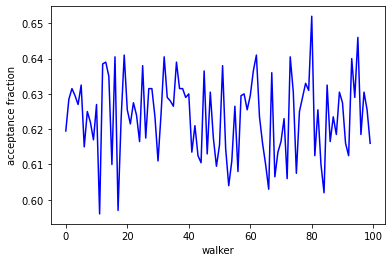

In [74]:
plt.plot(res.acceptance_fraction, 'b')
plt.xlabel('walker')
plt.ylabel('acceptance fraction')

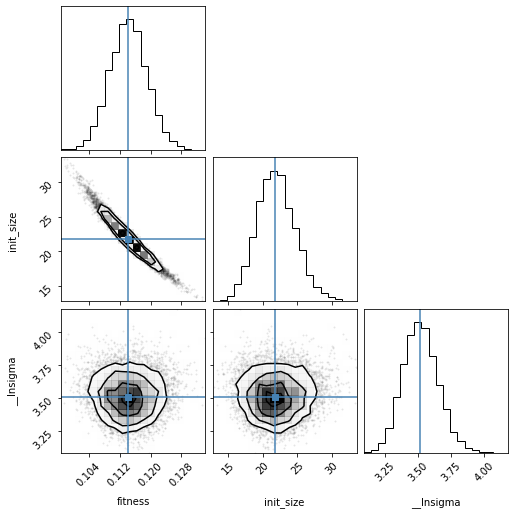

In [75]:
emcee_plot = corner.corner(res.flatchain, labels=res.var_names,
                           truths=list(res.params.valuesdict().values()))

In [76]:
print('median of posterior probability distribution')
print('--------------------------------------------')
lmfit.report_fit(res.params)

median of posterior probability distribution
--------------------------------------------
[[Variables]]
    fitness:    0.11416042 +/- 0.00488965 (4.28%) (init = 0.1146486)
    init_size:  21.7889597 +/- 2.82059573 (12.95%) (init = 21.50265)
    __lnsigma:  3.51290843 +/- 0.13268539 (3.78%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(fitness, init_size) = -0.980


In [77]:
highest_prob = np.argmax(res.lnprob)
hp_loc = np.unravel_index(highest_prob, res.lnprob.shape)
mle_soln = res.chain[hp_loc]
for i, par in enumerate(p):
    p[par].value = mle_soln[i]


print('\nMaximum Likelihood Estimation from emcee       ')
print('-------------------------------------------------')
print('Parameter  MLE Value   Median Value   Uncertainty')
fmt = '  {:5s}  {:11.5f} {:11.5f}   {:11.5f}'.format
for name, param in p.items():
    print(fmt(name, param.value, res.params[name].value,
              res.params[name].stderr))


Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  fitness      0.11473     0.11416       0.00489
  init_size     21.44046    21.78896       2.82060


In [78]:
print('\nError estimates from emcee:')
print('------------------------------------------------------')
print('Parameter  -2sigma  -1sigma   median  +1sigma  +2sigma')

for name in p.keys():
    quantiles = np.percentile(res.flatchain[name],
                              [2.275, 15.865, 50, 84.135, 97.275])
    median = quantiles[2]
    err_m2 = quantiles[0] - median
    err_m1 = quantiles[1] - median
    err_p1 = quantiles[3] - median
    err_p2 = quantiles[4] - median
    fmt = '  {:5s}   {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}'.format
    print(fmt(name, err_m2, err_m1, median, err_p1, err_p2))


Error estimates from emcee:
------------------------------------------------------
Parameter  -2sigma  -1sigma   median  +1sigma  +2sigma
  fitness    -0.0095  -0.0048   0.1142   0.0050   0.0097
  init_size    -5.1798  -2.6799  21.7890   2.9641   5.9584
